In [ ]:
from google.colab import drive

# Bağlantı oluştur
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/cnn_improvements")

In [ ]:
import os

# Mevcut çalışma dizini
current_directory = os.getcwd()
print("Mevcut Çalışma Dizini:", current_directory)



Mevcut Çalışma Dizini: /content/drive/My Drive/cnn_improvements


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Conv2D, Dropout, ReLU, MaxPooling2D, Flatten, Dense
import numpy as np
from matplotlib import pyplot as plt #Batch Normalization nedir ne işe yarar Kullanın.

In [ ]:
cifar_data  = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
(train,train_labels),(test,test_labels) = cifar_data

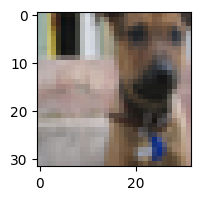

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(train[np.random.randint(0,len(train))])
plt.show();

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, ReLU, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri Artırma (Data Augmentation) için ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,  # Rastgele döndürme (0-20 derece arası)
    width_shift_range=0.2,  # Genişlikte rastgele kayma
    height_shift_range=0.2,  # Yükseklikte rastgele kayma
    shear_range=0.2,  # Kesme dönüşü
    zoom_range=0.2,  # Rastgele yakınlaştırma
    horizontal_flip=True,  # Yatay simetri
    fill_mode='nearest'  # Piksel dışı bölgeleri doldurma stratejisi
)

model = Sequential()

model.add(InputLayer(input_shape=train[0].shape))

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same"))
model.add(BatchNormalization())  # BatchNormalization katmanı
model.add(ReLU())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Convolutional Layer 2
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same"))
model.add(BatchNormalization())  # BatchNormalization katmanı
model.add(ReLU())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same"))
model.add(BatchNormalization())  # BatchNormalization katmanı
model.add(ReLU())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# Flatten Layer
model.add(Flatten())

# Output Layer
model.add(Dense(10, activation="softmax"))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
closs = CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["acc"])

# One Hot encoding
ctrain_labels = tf.keras.utils.to_categorical(train_labels)
ctest_labels = tf.keras.utils.to_categorical(test_labels)

# Modeli eğit
history = model.fit(datagen.flow(train, ctrain_labels, batch_size=64),
                    steps_per_epoch=len(train) // 64, epochs=10,
                    validation_data=(test, ctest_labels))
